컴퓨터 비전 1차 과제
- 과제 기한: 10월 18일 자정

- 과제명: 주어진 영상을 일고 4연결성/8연결성을 이용하여 영상을 라벨링하여 색칠하기

- 제출방법: colab에서 프로그램을 작성한 후 " .py" 확장자로 다운로드하여 가상대학에 제출하시기 바람

- 파일명: 학번.py

- 과제 제출 기한을 반드시 지키고, 이후에 제출시 감정



Python 버전 확인

In [ ]:
!python --version

Python 3.7.12


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.1.2'

이미지 다운로드

In [ ]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2021-10-18 06:28:24--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.40.193
Connecting to i.imgur.com (i.imgur.com)|151.101.40.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2021-10-18 06:28:25 (22.6 MB/s) - ‘iWGMlJR.png’ saved [491/491]



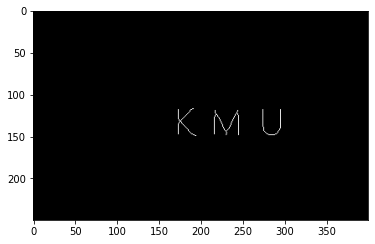

In [ ]:
img = cv2.imread('sample.png')

# image 출력
plt.imshow(img)
plt.show()

# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

- 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [52]:
def four_connect(img):
    # 함수 작성
    height, width = img.shape
    print(height, width)
    label = 0
    k = np.zeros((height, width))
    for i in range(0, height):
      for j in range(0, width):
        if img[i][j] == 0:
          k[i][j] = 0
        else:
          k[i][j] = -1
    for i in range(0, height):
      k[i][0] = 0
      k[i][width-1] = 0
    for j in range(0, width):
      k[0][j] = 0
      k[height-1][j] = 0
    for i in range(1, width - 1):
      for j in range(1, height - 1):
        if k[j][i] == -1:
          label += 1
          flood_fill4(k, j, i, label)
    
    print('라벨의 개수는:', label)
    return k

def flood_fill4(k, j, i, label):
  if k[j][i] == -1:
    k[j][i] = label
    flood_fill4(k, j, i+1, label)
    flood_fill4(k, j, i-1, label)
    flood_fill4(k, j-1, i, label)
    flood_fill4(k, j+1, i, label)

250 400
라벨의 개수는: 81


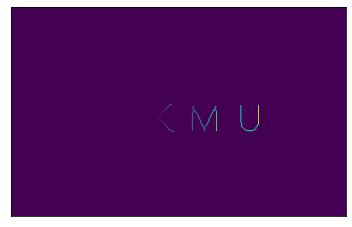

In [53]:
img = cv2.imread('sample.png')

img2 = img[:,:,0]
labeled_img = four_connect(img2)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

과제2: 8연결성 라벨링
- 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.-

In [25]:
def eight_connect(img):
    # 함수 작성
    height, width = img.shape
    k = np.zeros((height, width))
    label = 0
    for i in range(0, height):
      for j in range(0, width):
        if img[i][j] == 0:
          k[i][j] = 0
        else:
          k[i][j] = -1
    for j in range(0, height):
      k[j][0] = 0
      k[j][width-1] = 0
    for i in range(0, width):
      k[0][i] = 0
      k[height-1][i] = 0
    for i in range(1, width - 1):
      for j in range(1, height - 1):
        if k[j][i] == -1:
          label += 1
          flood_fill8(k, j, i, label)
    
    print('라벨의 개수는:', label)
    return k

def flood_fill8(k, j, i, label):
  if k[j][i] == -1:
    k[j][i] = label
    flood_fill8(k, j, i+1, label)
    flood_fill8(k, j-1, i, label)
    flood_fill8(k, j, i-1, label)
    flood_fill8(k, j+1, i, label)
    flood_fill8(k, j+1, i+1, label)
    flood_fill8(k, j+1, i-1, label)
    flood_fill8(k, j-1, i+1, label)
    flood_fill8(k, j-1, i-1, label)

라벨의 개수는: 3


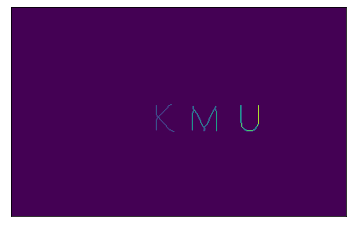

In [26]:
img = cv2.imread('sample.png')

img3 = img[:,:,0]
labeled_img = eight_connect(img3)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()